In [40]:
#Historical data from tech stocks are used to find the most ideal portfolio.
#Closing prices have been imported for Apple, IBM, Cisco & Amazon for five years.
#The most ideal portfolio of stocks would be the one that would provide the highest return for the minimal risk
#A random number generator is used to generate allocations to stocks, and the anticipated return and risk are quantified for each
#The Sharpe Ratio, which is the ratio of return to risk is used to pick the best portfolio

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

from datetime import datetime

import quandl

from pylab import rcParams
rcParams['figure.figsize'] = 16, 8

In [201]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [226]:
#Importing the closing price of Apple, Cisco, IBM and Amazon stocks

stocks = ['Apple', 'Cisco', 'IBM', 'Amazon']

apple = quandl.get('WIKI/AAPL.11', start_date = start, end_date = end)
cisco = quandl.get('WIKI/CSCO.11', start_date = start, end_date = end)
ibm = quandl.get('WIKI/IBM.11', start_date = start, end_date = end)
amazon = quandl.get('WIKI/AMZN.11', start_date = start, end_date = end)

In [203]:
stock_closing_price = round(pd.concat([apple, cisco, ibm, amazon], axis = 1),2)
stock_closing_price.columns = ['Apple', 'Cisco', 'IBM', 'Amazon']

In [44]:
stock_closing_price.head()

,Apple,Cisco,IBM,Amazon
Date,,,,
2012-01-03,52.85,15.62,157.58,179.03
2012-01-04,53.13,15.92,156.94,177.51
2012-01-05,53.72,15.86,156.19,177.61
2012-01-06,54.28,15.80,154.40,182.61
2012-01-09,54.20,15.90,153.59,178.56


In [194]:
#Finding the correlation between the (arithmetic) daily returns of the stocks

stock_closing_price.pct_change(1).corr()

,Apple,Cisco,IBM,Amazon
Apple,1.000000,0.301471,0.297485,0.235353
Cisco,0.301471,1.000000,0.424773,0.284550
IBM,0.297485,0.424773,1.000000,0.258692
Amazon,0.235353,0.284550,0.258692,1.000000


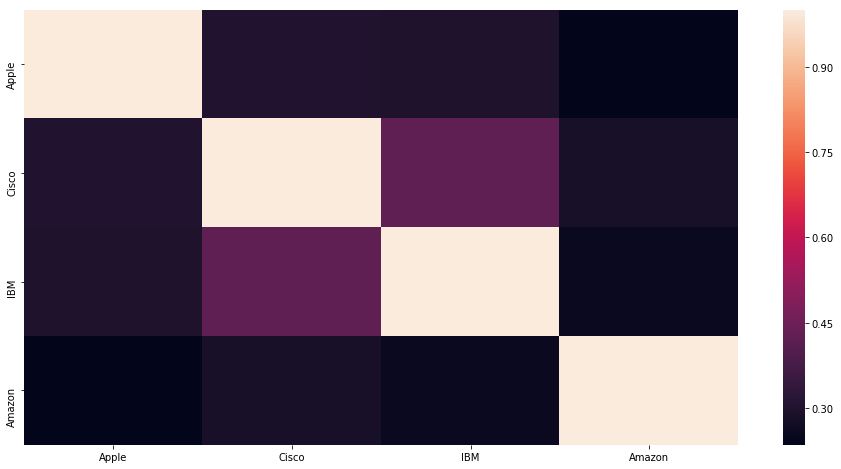

In [197]:
#The heatmap below demonstrates the correlation between the different stocks in terms of the daily return of their closing prices
#CISCO & IBM have the best correlation, shown by their high correlation coefficients. 

sns.heatmap(stock_closing_price.pct_change(1).corr())

In [46]:
#Finding the log returns of the closing prices of the different stocks. 
#Using the logarithmic method to calculate the daily returns is a more accurate representation of daily returns, than the previously used arithmetic method.

log_ret = np.log(stock_closing_price / stock_closing_price.shift(1))
log_ret.head()

,Apple,Cisco,IBM,Amazon
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005284,0.019024,-0.004070,-0.008526
2012-01-05,0.011044,-0.003776,-0.004790,0.000563
2012-01-06,0.010370,-0.003790,-0.011527,0.027763
2012-01-09,-0.001475,0.006309,-0.005260,-0.022428


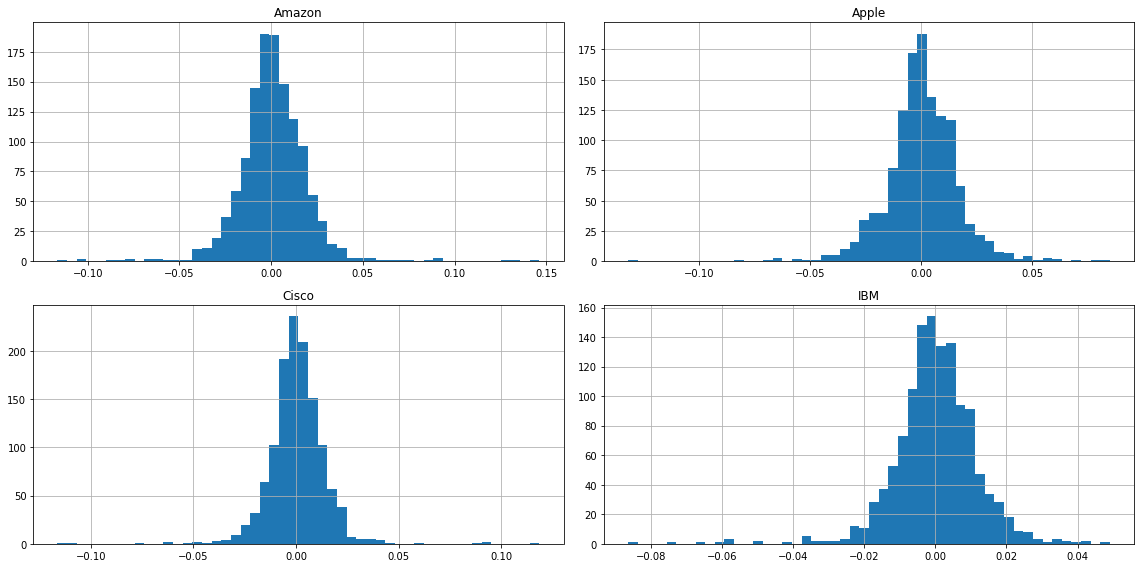

In [47]:
#The histograms here show the variation in the frequency of the different daily logarithmic returns. 

log_ret.hist(bins = 50)
plt.tight_layout()

In [198]:
#A random number generator with a seed of 105 is used to generate weights, which are the allocations of stock portfolios
#The weights have been normalized to make sure they add up to 1.
#The Sharpe Ratio is used as a metric to evaluate the lucrativeness of the tech stocks.
#The Sharpe Ratio is the ratio of the expected returns to the expected volatility and quantifies the maximum return an investor can expect for a given risk.
#The higher the Sharpe Ratio the better.
#The portfolio of stocks with the highest Sharpe Ratio is the best allocation possible.

np.random.seed(105)

num_ports = 25000
all_weights = np.zeros((num_ports, len(stock_closing_price.columns) ))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharp_arr = np.zeros(num_ports)

for ind in range(num_ports):

    #Calculating the weights adding up to 1.

    weights = np.array(np.random.random(4)) 
    weights = weights / np.sum(weights)
    all_weights[ind, :] = weights

    # Calculating the expected returns

    exp_ret = np.sum((log_ret.mean() * weights) * 252)
    ret_arr[ind] = exp_ret

    #Calculating the expected volatility

    exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    vol_arr[ind] = exp_vol

    #Calculating the sharpe ratio 

    SR = ret_arr[ind] / vol_arr[ind]
    sharp_arr[ind] = SR

In [216]:
#Finding the location of the max of the sharpe ratio - that is the best combination of stocks

sharp_arr.argmax()

max_vol = vol_arr[sharp_arr.argmax()]
max_ret = ret_arr[sharp_arr.argmax()]
best_weights = all_weights[sharp_arr.argmax(), :]

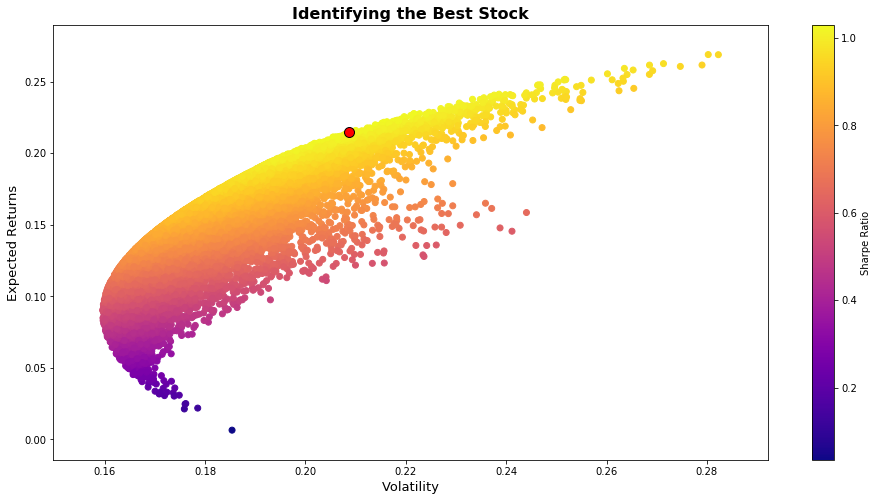

In [217]:
#The plot shows the maximum return that can be expected for a given risk (volatility). 

plt.scatter(x = vol_arr, y = ret_arr, c = sharp_arr, cmap = 'plasma')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatility', fontsize = 13)
plt.ylabel('Expected Returns', fontsize = 13)
plt.title('Identifying the Best Stock', fontsize = 16, weight = 'bold')

#Finding the portfolio with the best sharpe ratio
plt.scatter(max_vol, max_ret, c = 'red', s = 100, edgecolors = 'black')

In [242]:
print('FINAL RECOMMENDATION \n')

for i in range(0, len(stocks)):
    print('The most optimal allocation would be', round(best_weights[i] * 100,2), '% to', stocks[i])

FINAL RECOMMENDATION 

The most optimal allocation would be 26.13 % to Apple
The most optimal allocation would be 22.76 % to Cisco
The most optimal allocation would be 0.33 % to IBM
The most optimal allocation would be 50.79 % to Amazon
